# Finite Automata, Push-down Automata

## 1. Regular Expressions

In [41]:
import re 

x = re.compile('a*b*')
x.findall('absdbfhsdbfaabbabababhsdbfhsdbfhbababbabaaaababbaa')

['ab',
 '',
 '',
 'b',
 '',
 '',
 '',
 '',
 'b',
 '',
 'aabb',
 'ab',
 'ab',
 'ab',
 '',
 '',
 '',
 'b',
 '',
 '',
 '',
 '',
 'b',
 '',
 '',
 'b',
 'ab',
 'abb',
 'ab',
 'aaaab',
 'abb',
 'aa',
 '']

In [55]:
email = r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)"
email = re.compile(email)

email.findall("sd sdlfjsldfkj sllkj 23u9eoiasj asd@ slkdfj sfslkj@s.dfsdfj davendiy@gmail.com ALDJHA")

['sfslkj@s.dfsdfj', 'davendiy@gmail.com']

From standard [rfc5322](https://www.ietf.org/rfc/rfc5322.txt):

```(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])```


(try online: https://regex101.com/)

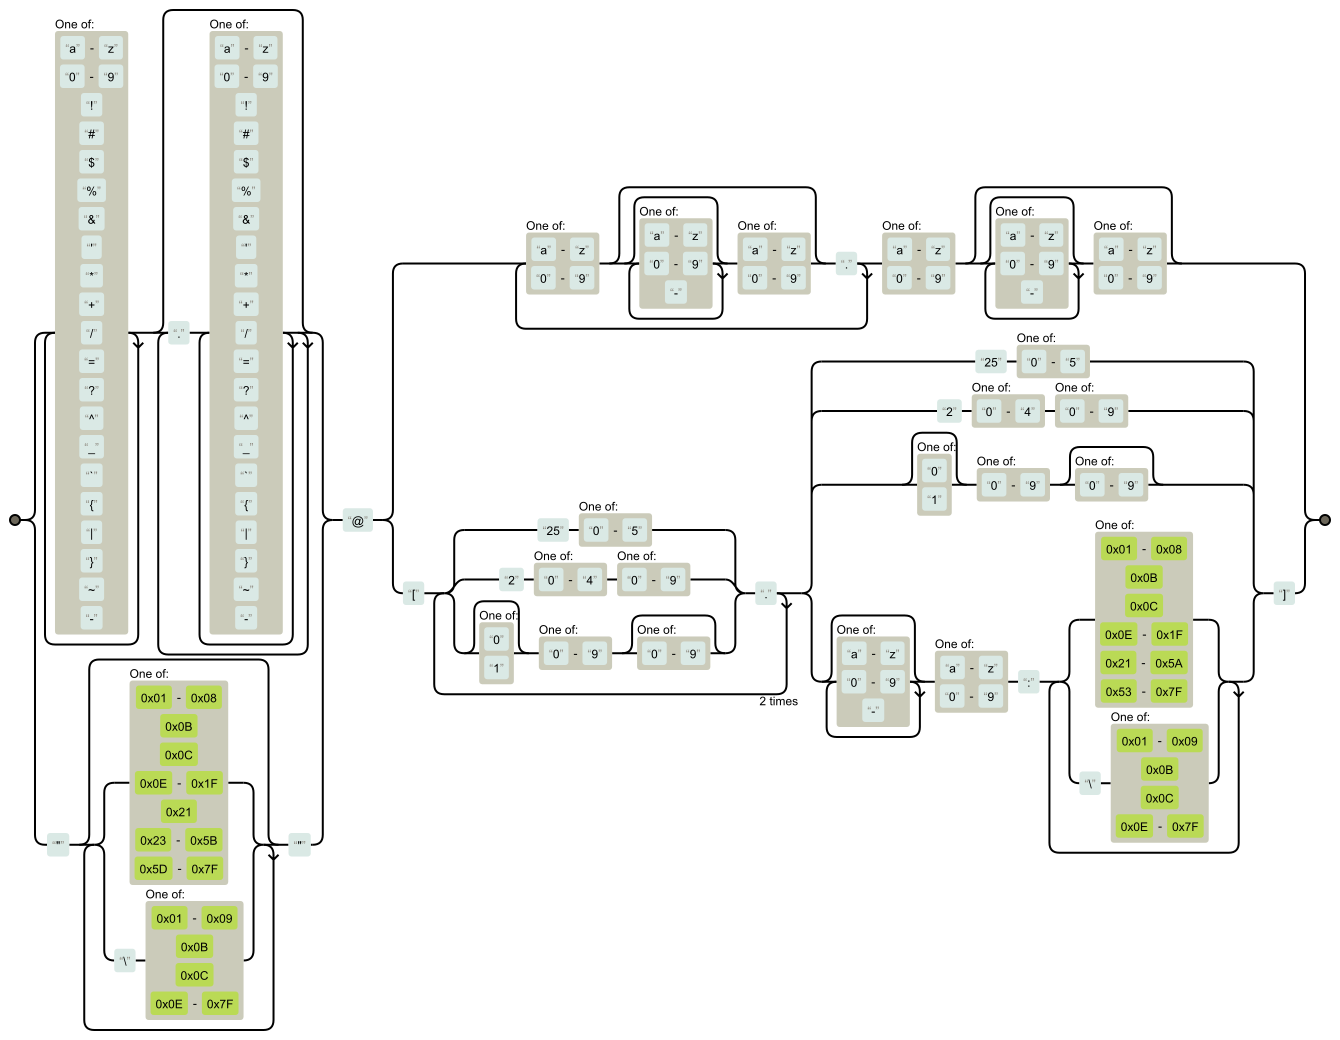

### Regex to automaton converter: 
- NDFA: https://cyberzhg.github.io/toolbox/regex2nfa?regex=KFthLXpBLVowLTlfListXStAW2EtekEtWjAtOS1dK1wuW2EtekEtWjAtOS0uXSsp
- DFA: https://cyberzhg.github.io/toolbox/nfa2dfa?regex=KFthLXpBLVowLTlfListXStAW2EtekEtWjAtOS1dK1wuW2EtekEtWjAtOS0uXSsp
- Min DFA: https://cyberzhg.github.io/toolbox/min_dfa?regex=KFthLXpBLVowLTlfListXStAW2EtekEtWjAtOS1dK1wuW2EtekEtWjAtOS0uXSsp

### Regex with code execution: 
- http://www.colm.net/open-source/ragel/


----------------------

## Context-free grammar

### BNF Form: 

```
expr ::= expr + term
     |   expr - term
     |   term

term ::= term * factor
     |   term / factor
     |   factor

factor ::= ( expr )
       |    NUM
```

### EBNF Form:

```
expr ::= term { (+|-) term }*

term ::= factor { (*|/) factor }*

factor ::= ( expr )
       |   NUM
```

In [27]:
class ExpressionEvaluator: 
    ... 

    def expr(self): 
        ... 

    def term(self): 
        ... 

    def factor(self):
        ...

### Using builtin Python module

- https://ply.readthedocs.io/en/latest/index.html
- https://en.wikipedia.org/wiki/Conjunctive_grammar


In [62]:
# !bat --theme="Monokai Extended Light" exp_pure_parser.py

In [39]:
!bat --theme="Monokai Extended Light" example_lang.py

───────┬────────────────────────────────────────────────────────────────────────
       │ File: example_lang.py
───────┼────────────────────────────────────────────────────────────────────────
   1   │ from ply.lex import lex
   2   │ from ply.yacc import yacc 
   3   │ 
   4   │ tokens = [ 'NUM', 'PLUS', 'MINUS', 'TIMES', 'DIVIDE', 'LPAREN', 'RPAREN
       │ ' ]
   5   │ t_ignore = ' \t\n'
   6   │ 
   7   │ t_PLUS = r'\+'
   8   │ t_MINUS = r'-'
   9   │ t_TIMES = r'\*'
  10   │ t_DIVIDE = r'/'
  11   │ t_LPAREN = r'\('
  12   │ t_RPAREN = r'\)'
  13   │ 
  14   │ # Token processing functions
  15   │ def t_NUM(t):
  16   │     r'\d+'
  17   │     t.value = int(t.value)
  18   │     return t
  19   │ 
  20   │ # Error handler
  21   │ def t_error(t):
  22   │     print('Bad character: {!r}'.format(t.value[0]))
  23   │     t.skip(1)
  24   │ 
  25   │ # Build the lexer
  26   │ lexer = lex()
  27   │ 
  28   │ 
  29   │ # Grammar rules and handler functions
  30   │ def p_expr(p):
  

In [58]:
from example_lang import parser

In [60]:
parser.parse('2 + (3 + 4) * 5 + 19')

56

### ply also generates Python code:

In [74]:
!bat --theme="Monokai Extended Light" parsetab.py

───────┬────────────────────────────────────────────────────────────────────────
       │ File: parsetab.py
───────┼────────────────────────────────────────────────────────────────────────
   1   │ 
   2   │ # parsetab.py
   3   │ # This file is automatically generated. Do not edit.
   4   │ # pylint: disable=W,C,R
   5   │ _tabversion = '3.10'
   6   │ 
   7   │ _lr_method = 'LALR'
   8   │ 
   9   │ _lr_signature = 'DIVIDE LPAREN MINUS NUM PLUS RPAREN TIMES\n    expr : 
       │ expr PLUS term\n    | expr MINUS term\n    \n    expr : term\n    \n   
       │  term : term TIMES factor\n    | term DIVIDE factor\n    \n    term : f
       │ actor\n    \n    factor : NUM\n    \n    factor : LPAREN expr RPAREN\n 
       │    '
  10   │     
  11   │ _lr_action_items = {'NUM':([0,5,6,7,8,9,],[4,4,4,4,4,4,]),'LPAREN':([0,
       │ 5,6,7,8,9,],[5,5,5,5,5,5,]),'$end':([1,2,3,4,11,12,13,14,15,],[0,-3,-6,
       │ -7,-1,-2,-4,-5,-8,]),'PLUS':([1,2,3,4,10,11,12,13,14,15,],[6,-3,-6,-7,6
       │ 

### and extends grammar:

(check [file](./parser.out))

In [3]:
!head parser.out

Created by PLY version 3.11 (http://www.dabeaz.com/ply)

Grammar

Rule 0     S' -> expr
Rule 1     expr -> expr PLUS term
Rule 2     expr -> expr MINUS term
Rule 3     expr -> term
Rule 4     term -> term TIMES factor
Rule 5     term -> term DIVIDE factor


## Using Lark
https://github.com/lark-parser/lark/tree/master

Applications: 
 - [poetry](https://github.com/lark-parser/lark/tree/master)
 - [harmalysis](https://github.com/napulen/harmalysis)
 - [lang-chain](https://github.com/langchain-ai/langchain?tab=readme-ov-file)

### Example: JSON

https://github.com/lark-parser/lark/blob/master/docs/json_tutorial.md

In [64]:
!cat example.json

{
    "empty_object" : {},
    "empty_array"  : [],
    "booleans"     : { "YES" : true, "NO" : false },
    "numbers"      : [ 0, 1, -2, 3.3, 4.4e5, 6.6e-7 ],
    "strings"      : [ "This", [ "And" , "That", "And a \"b" ] ],
    "nothing"      : null
}

In [65]:
import sys

from lark import Lark, Transformer, v_args

json_grammar = r"""
    ?start: value

    ?value: object
          | array
          | string
          | SIGNED_NUMBER      -> number
          | "true"             -> true
          | "false"            -> false
          | "null"             -> null

    array  : "[" [value ("," value)*] "]"
    object : "{" [pair ("," pair)*] "}"
    pair   : string ":" value

    string : ESCAPED_STRING

    %import common.ESCAPED_STRING
    %import common.SIGNED_NUMBER
    %import common.WS

    %ignore WS
"""


class TreeToJson(Transformer):
    @v_args(inline=True)
    def string(self, s):
        return s[1:-1].replace('\\"', '"')

    array = list
    pair = tuple
    object = dict
    number = v_args(inline=True)(float)

    null = lambda self, _: None
    true = lambda self, _: True
    false = lambda self, _: False


### Create the JSON parser with Lark, using the Earley algorithm
# json_parser = Lark(json_grammar, parser='earley', lexer='basic')
# def parse(x):
#     return TreeToJson().transform(json_parser.parse(x))

### Create the JSON parser with Lark, using the LALR algorithm
json_parser = Lark(json_grammar, parser='lalr',
                   # Using the basic lexer isn't required, and isn't usually recommended.
                   # But, it's good enough for JSON, and it's slightly faster.
                   lexer='basic',
                   # Disabling propagate_positions and placeholders slightly improves speed
                   propagate_positions=False,
                   maybe_placeholders=False,
                   # Using an internal transformer is faster and more memory efficient
                   transformer=TreeToJson())
parse = json_parser.parse


In [67]:
with open('example.json') as file: 
    data = parse(file.read())

data

{'empty_object': {},
 'empty_array': [],
 'booleans': {'YES': True, 'NO': False},
 'numbers': [0.0, 1.0, -2.0, 3.3, 440000.0, 6.6e-07],
 'strings': ['This', ['And', 'That', 'And a "b']],
 'nothing': None}

### Context-free grammar to automaton converter

https://mdaines.github.io/grammophone/#/sentences

1. example: expression

In [48]:
!cat exp_bnf_form.txt

EXPR -> EXPR "+" TERM
     |   EXPR "-" TERM
     |   TERM .

TERM -> TERM "*" FACTOR
     |   TERM "/" FACTOR
     |   FACTOR .

FACTOR -> "(" EXPR ")"
       |    NUM . 

NUM -> "3" .

2. example: json

In [49]:
!cat json_bnf_form.txt

S -> VALUE . 
VALUE -> OBJECT 
       | ARRAY 
       | STRING 
       | "true" 
       | "false" .
ARRAY -> "[" PURE_ARRAY "]" . 
PURE_ARRAY -> VALUE 
           | PURE_ARRAY "," VALUE . 
OBJECT -> "{" PURE_OBJECT "}" . 
PURE_OBJECT -> PAIR 
            |  PURE_OBJECT "," PAIR . 
PAIR -> STRING ":" VALUE . 
STRING -> "'string'" .

-----------

## 3. Exploits 

### xz vulnerability

- description: https://arstechnica.com/security/2024/04/what-we-know-about-the-xz-utils-backdoor-that-almost-infected-the-world/
- demo: https://github.com/amlweems/xzbot#backdoor-format


### how to save valid keys? 

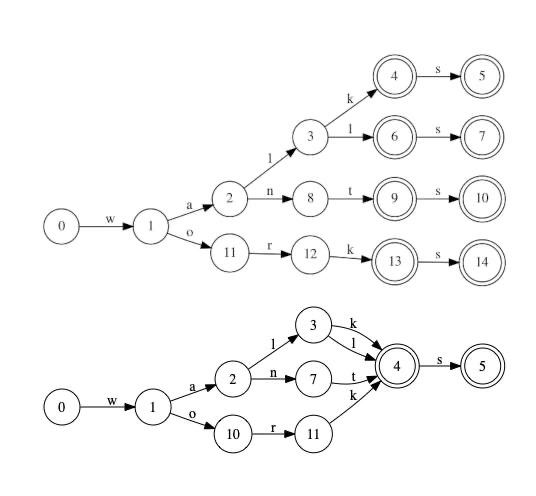

In [54]:
import pprint

_end = '_end_'

def make_trie(*words):
     root = dict()
     for word in words:
         current_dict = root
         for letter in word:
             current_dict = current_dict.setdefault(letter, {})
         current_dict[_end] = _end
     return root


pprint.pprint(make_trie("test", "banana", "performance", "teteriv"))

{'b': {'a': {'n': {'a': {'n': {'a': {'_end_': '_end_'}}}}}},
 'p': {'e': {'r': {'f': {'o': {'r': {'m': {'a': {'n': {'c': {'e': {'_end_': '_end_'}}}}}}}}}}},
 't': {'e': {'s': {'t': {'_end_': '_end_'}},
             't': {'e': {'r': {'i': {'v': {'_end_': '_end_'}}}}}}}}


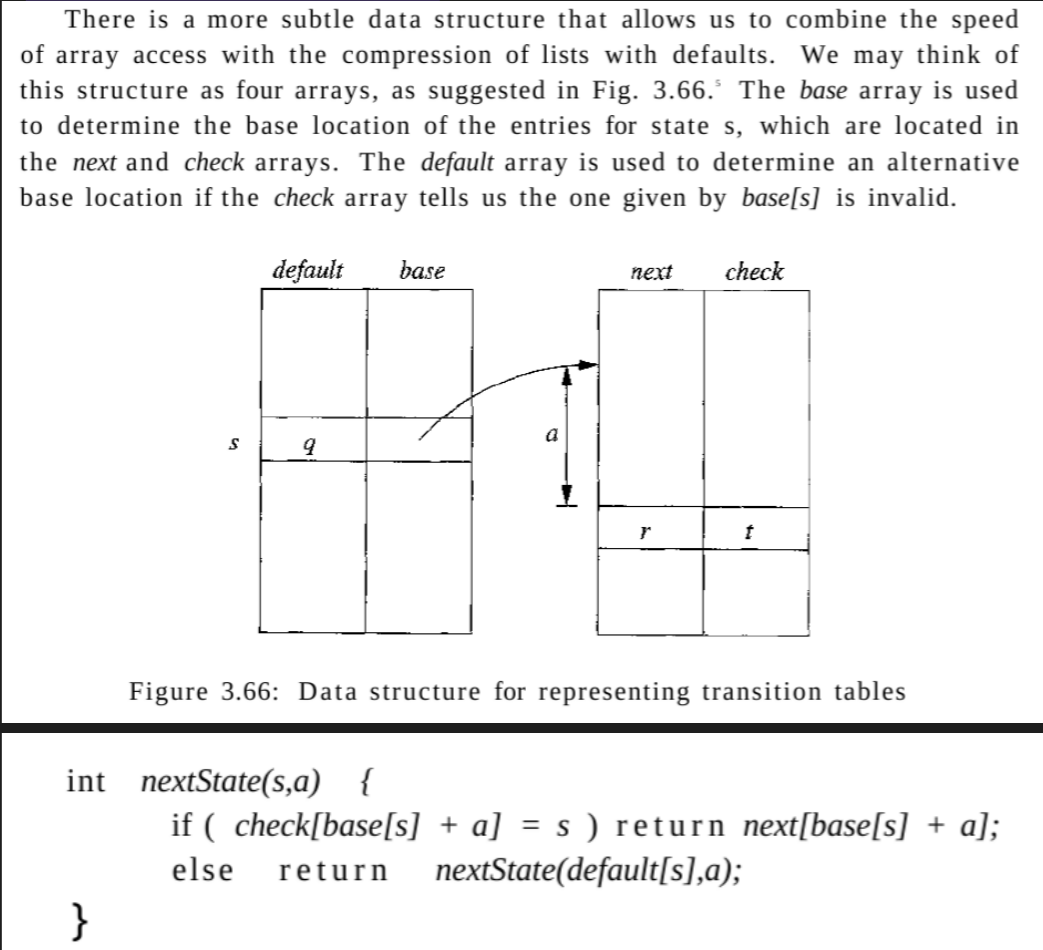